<a href="https://colab.research.google.com/github/AnupDesai/Machine_Learning_Tutorial_Op_Meterology/blob/main/Machine_Learning_Tutorial_Op_Meterology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial for `A Machine Learning Tutorial for Operational Meteorology`**

**- Part I : Logistic Regression**


**Creator: Anup Desai**

**Affiliation: North Carolina Institite for Climate Studies**

# Overview



This notebook aims at providing formal instruction on some of the fundamental concepts and techniques in Machine Learning particularly keeping in mind the use of these methods in meteorology. 




`Logistic Regression`, A common Machine Learning method for classification tasks has been demonstrated in this notebook on a familiar meteorological problem and dataset.












> **Prerequisites**: Basic understanding of python programming and machine learning methods used for classification tasks.

> **Targeted Level**: This notebook aims to target and help beginners in Machine Learning.

> **Learning outcomes** : After going through this notebook, users can be confident in applying the Logistic Regression method to solve classifcation tasks on real-world datasets.

# Exploring the SEVIR Dataset

> This section of the notebook will provide the background related to the ML problem with visualization of the dataset, implementation of the numerous ML methods described in the overview section and comparison of the results obtained after fitting the 

**Data Visualization**

> It is in the best practice in the space of Machine Learning to visualize the dataset to better understand the nature of the data and its nuances. 

> Additionally, plotting the data helps understand the biases present in the dataset that would eventually progagate into the model we build.

> The following subsection describes a data example from `The Storm Event Imagery (SEVIR)`.

> The first step to begin visualizing the data is to import the necessary packages.

In [1]:
## Firstly let us install some packages that will help us to perform basic operations on data
!pip install geemap # This package will enable us to install geemap package to read our data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 KB 4

In [2]:
## Importing necessary python packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import requests
from pathlib import Path
import pandas as pd
import os
import geemap
import matplotlib as mp
import sklearn

## Importing some helper functions to perform fundamental operations on data
help_dict={"aux_functions.py":"https://raw.githubusercontent.com/AnupDesai/Machine_Learning_Tutorial_Op_Meterology/main/scripts/aux_functions.py",
          "gewitter_functions.py":"https://raw.githubusercontent.com/ai2es/WAF_ML_Tutorial_Part1/main/scripts/gewitter_functions.py"} ## Add the helper functions you want to add to the list

for help,url_link in help_dict.items():
  if Path(help).is_file():
    print(f"The helper function {help} already exists, skipping download")
  else:
    request= requests.get(url_link)
    print(f"Downloading the helper function script: {help}")
    with open(help,"wb") as h:
      h.write(request.content)

from aux_functions import show_vals,draw_zoom_window,get_right_units_vil, plot_feature_loc,load_n_combine_df

## setting up the plot parameters 
import matplotlib as mp
import matplotlib.pyplot as plt

mp.rcParams["axes.facecolor"] = [0.5,0.5,0.5] ## parameter makes a gray background to axis face
mp.rcParams["axes.titlesize"]= 12 
mp.rcParams["axes.labelsize"]= 14 # Fontsize
mp.rcParams["xtick.labelsize"]= 12
mp.rcParams["ytick.labelsize"]= 12
mp.rcParams["legend.fontsize"] = 12
mp.rcParams["legend.facecolor"] = 'w'
mp.rcParams["savefig.transparent"]= False

## Make default resolution higher
%config InlineBackend.figure_format = 'retina'


In [3]:
# Let us take a look the versions of the libraries we are using to be on the same page
print(f"xarray: {xr.__version__}")
print(f"matplotlib: {mp.__version__}")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"geemap: {geemap.__version__}")
print(f"Sklearn: {sklearn.__version__}")

xarray: 2022.12.0
matplotlib: 3.5.3
numpy: 1.22.4
pandas: 1.4.4
geemap: 0.20.1
Sklearn: 1.2.2


In [4]:
## Downloading .csv files 
csv_list= ["IR_stats_master.csv","WV_stats_master.csv","VIS_stats_master.csv","VIL_stats_master.csv","LI_stats_master.csv"]
for url in csv_list:
  if Path(url).is_file():
    print(f"The helper function {url} already exists, skipping download")
  else:
    url_link = "https://raw.githubusercontent.com/ai2es/WAF_ML_Tutorial_Part1/main/datasets/sevir/"
    request= requests.get(url_link +'/'+ url)
    print(f"Downloading the helper function script: {url}")
    with open(url,"wb") as h:
      h.write(request.content)

In [5]:
file_path = os.path.abspath('onestorm.nc')
if not os.path.exists(file_path):
    url = 'https://github.com/ai2es/WAF_ML_Tutorial_Part1/blob/main/datasets/sevir/onestorm.nc'
    geemap.download_file(url)



Downloading...
From: https://raw.githubusercontent.com/ai2es/WAF_ML_Tutorial_Part1/main/datasets/sevir/onestorm.nc
To: /content/onestorm.nc
100%|██████████| 39.1M/39.1M [00:00<00:00, 353MB/s]


> Load some data to visualize: The raw data here are in hdf5 file format (a common file type), but we will utilize data that is smaller and easier to deal with.

> We will leverage `xarray` to use and open the simple netCDF4 file to visualize a storm from August 2017.

In [6]:
dataset = xr.open_dataset(file_path)
dataset

<xarray.Dataset>
Dimensions:            (x: 768, y: 768, t: 12, x2: 192, y2: 192, x3: 384,
                        y3: 384, x4: 48, y4: 48)
Dimensions without coordinates: x, y, t, x2, y2, x3, y3, x4, y4
Data variables:
    visible            (x, y, t) float32 ...
    water_vapor        (x2, y2, t) float32 ...
    clean_infrared     (x2, y2, t) float32 ...
    vil                (x3, y3, t) float32 ...
    lightning_flashes  (x4, y4, t) float32 ...
Attributes:
    t:        time dimension of all images. These are 5-min time steps
    x:        x pixel dimension of the visible imagery
    y:        y pixel dimension of the visible imagery
    x2:       x pixel dimension of the water vapor and infrared imagery
    y2:       y pixel dimension the water vapor and infrared imagery
    x3:       x pixel dimension of the vertically integrated liquid imagery
    y3:       y pixel dimension the vertically integrated liquid imagery
    x4:       x pixel dimension of the lightning flashes
    y4:       y pixel dimension of the lightning flashes

> Now, we have loaded the data using `xarray` its time to visualize the images/visible-imagery `ds.visible`. 

> The visible imagery is the `reflectance factor` and to save the data in an efficient way, the data is stored in the form of integers without decimal places and multiplied by 10 ^ 4. Thus, to scale back, we must multiply by 10^-4.

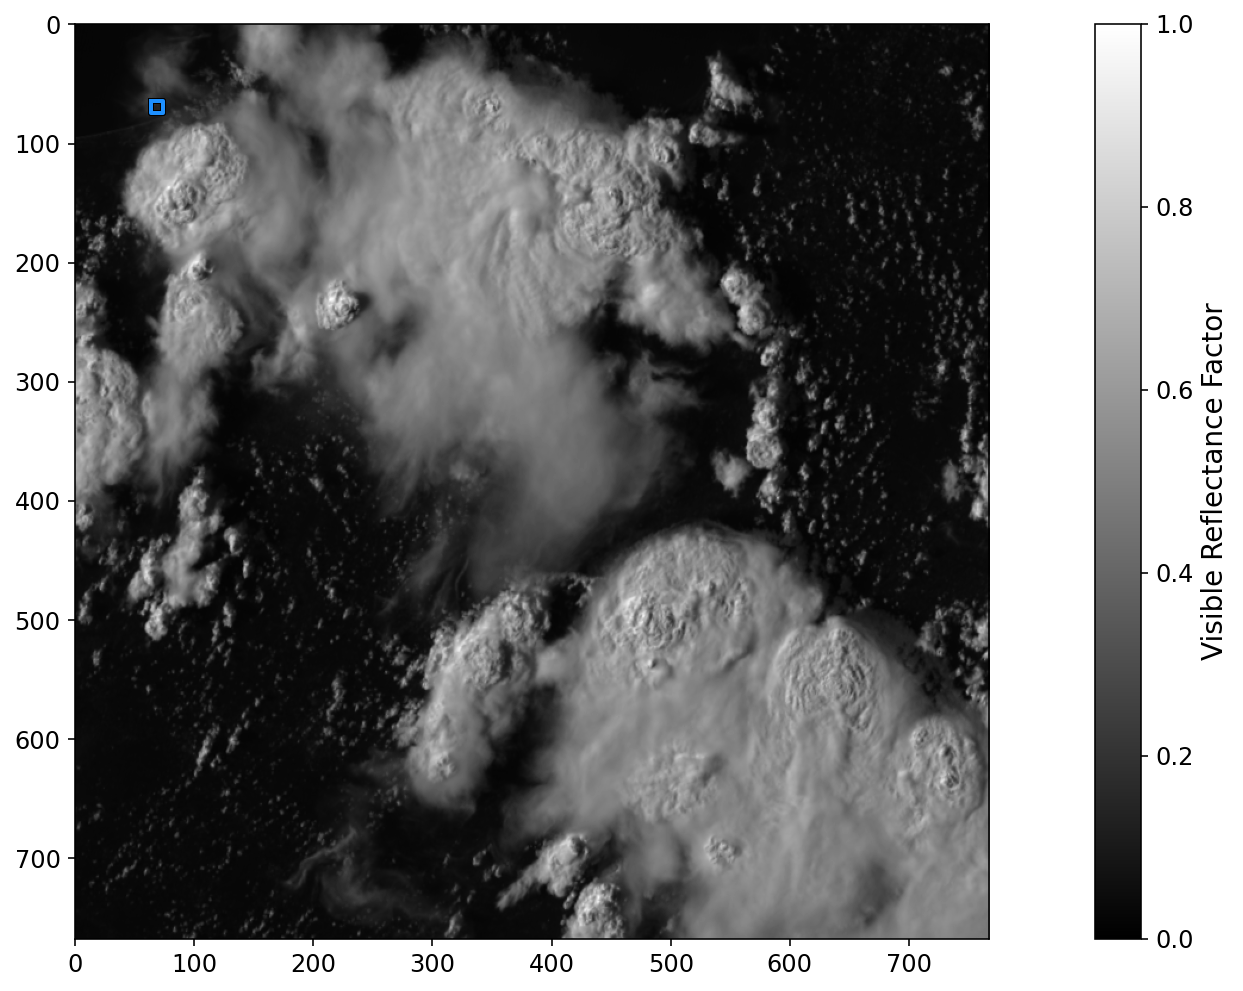

In [7]:
def visualize_image(dataset):
  plt.figure(figsize=(15,7))
  xzoom,yzoom= draw_zoom_window(plt.gca(),64,64)
  plt.imshow(dataset.visible[:,:,0] * 1e-4, cmap='gray',vmin=0,vmax=1)
  xzoom,yzoom= draw_zoom_window(plt.gca(),64,64)
  plt.colorbar(label='Visible Reflectance Factor')
  plt.tight_layout()

visualize_image(dataset)

> To dive into more details of the satellite imagery available for Machine Learning, the images are rasters. In layman terms the images are group of pixels with assigned values. 

> We will visualize a portion of the image to make sure the pixels are assigned with values.

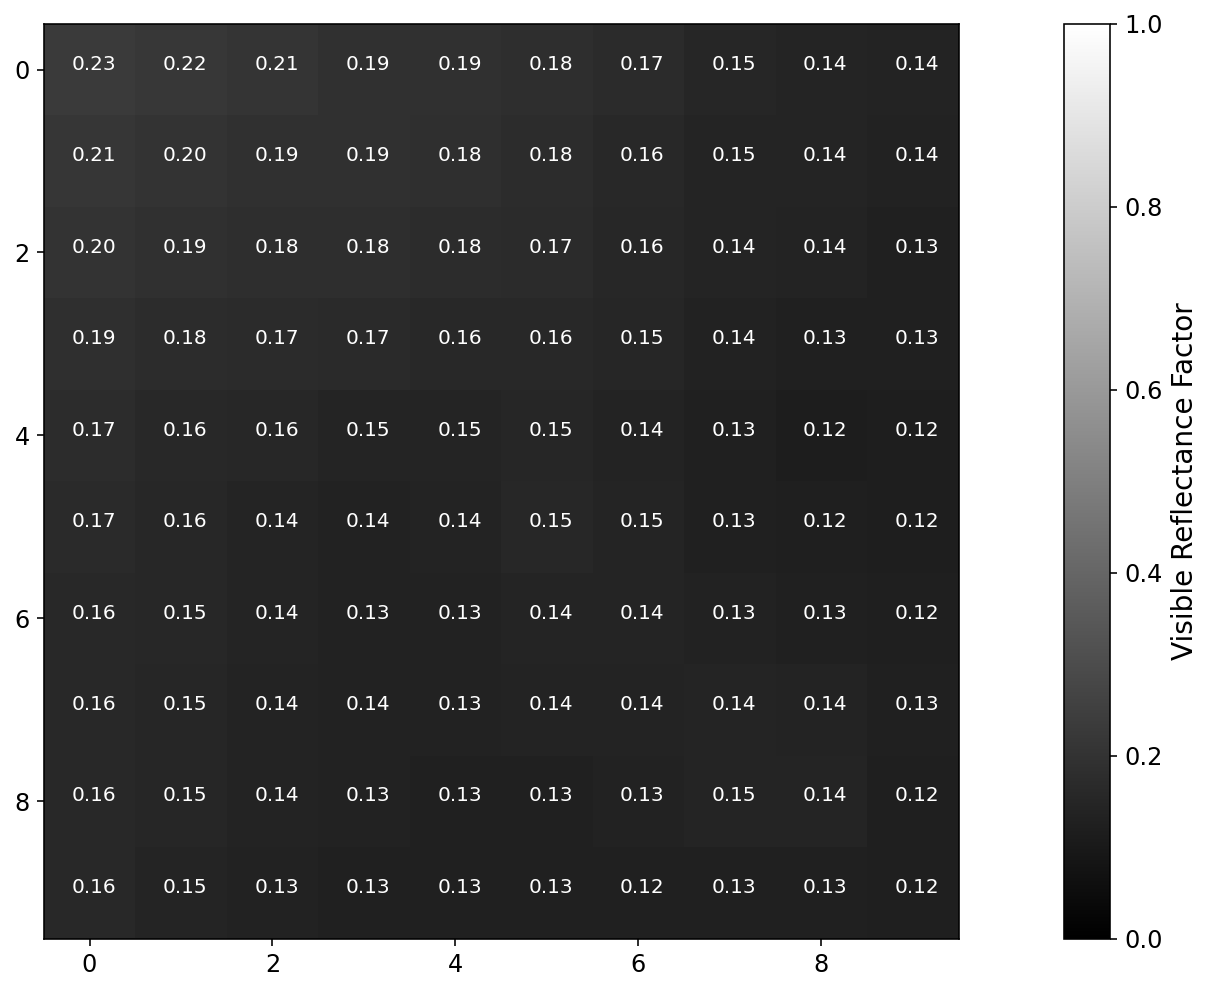

In [8]:
plt.figure(figsize=(15,7))
xzoom,yzoom= draw_zoom_window(plt.gca(),64,64)
plt.imshow(dataset.visible[xzoom:xzoom+10,yzoom:yzoom+10,0] * 1e-4, cmap='gray', vmin=0, vmax=1)
show_vals(dataset.visible[xzoom:xzoom+10,yzoom:yzoom+10,0] * 1e-4, ax=plt.gca())
plt.colorbar(label='Visible Reflectance Factor')
plt.tight_layout()

> The above visualization depicts what ultimately that data will look like when we deep dive into the images. But, for our ML models, we need to extract numerical characterstics of the sattelite images.

> To take a look at all the available data, we can plot the data at one time step

In [9]:
def plot_attributes(frame_idx):

  figure,axes= plt.subplots(2,3,figsize=(15,10))
  axs= axes.ravel()
  figure.set_facecolor('w')
  frame_idx=0

  shrink_param = 0.5
  fontsize_1 = 12
  fontsize_2 = 14
  ax_prop = dict(boxstyle='square', facecolor="White", alpha=0.75)

  ######## Subplot of First Attribute: Visible Imagery ############
  ax1= axs[0]
  img1 = ax1.imshow(dataset.visible[:,:,frame_idx] * 1e-4, cmap='gray', vmin=0)
  color_bar= plt.colorbar(img1, ax=ax1, shrink=shrink_param, extend= 'max')
  ax1.set_title('Visible')
  color_bar.set_label('Reflectance factor', fontsize=fontsize_1)
  color_bar.ax.tick_params(labelsize=fontsize_2)
  ax1.text(0.05,0.15,'a)',transform= ax1.transAxes,fontsize=fontsize_2, verticalalignment='top', bbox=ax_prop)

  ######## Subplot of Second Attribute: Water Vapor Inagery ############
  ax2= axs[1]
  img2 = ax2.imshow(dataset.water_vapor[:,:,frame_idx]*1e-2, cmap='Blues')
  color_bar= plt.colorbar(img2, ax=ax2, shrink=shrink_param, extend= 'both')
  ax2.set_title('Mid-level Water Vapor')
  color_bar.set_label('Brightness Temperature', fontsize=fontsize_1)
  color_bar.ax.tick_params(labelsize=fontsize_2)
  ax2.text(0.05,0.15,'b)',transform= ax2.transAxes,fontsize=fontsize_2, verticalalignment='top', bbox=ax_prop)

  ######## Subplot of Third Attribute: Infrared Imagery ############
  ax = axs[2]
  img = ax.imshow(dataset.clean_infrared[:,:,frame_idx]*1e-2,cmap='RdBu')
  color_bar = plt.colorbar(img,ax=ax,shrink=shrink_param,extend='both')
  color_bar.set_label('Brightness Temperature, [$\degree$C]',fontsize=fontsize_1)
  color_bar.ax.tick_params(labelsize=fontsize_1)
  ax.set_title('Clean Infrared (10.7 $\mu$m)')
  ax.text(0.05, 0.15, 'c)', transform=ax.transAxes,fontsize=fontsize_2,
          verticalalignment='top', bbox=ax_prop)

  ######## Subplot of Fourth Attribute: Vertical Integrated Liquid ############
  ax = axs[3]
  vil = get_right_units_vil(dataset.vil.values)
  img = ax.imshow(vil[:,:,frame_idx],cmap='Spectral_r',vmin=0)
  color_bar = plt.colorbar(img,ax=ax,shrink=shrink_param,extend='max')
  color_bar.set_label('Vertically Integrated Liquid, [$kg \ m^{-2}$]',fontsize=fontsize_1)
  color_bar.ax.tick_params(labelsize=fontsize_1)
  ax.set_title('NEXRAD')
  ax.text(0.05, 0.15, 'd)', transform=ax.transAxes,fontsize=fontsize_2,
          verticalalignment='top', bbox=ax_prop)

  ######## Subplot of Fifth Attribute: GLM Lightning Flashes ############
  ax = axs[4]
  img = ax.imshow(dataset.lightning_flashes[:,:,frame_idx],cmap='magma')
  color_bar = plt.colorbar(img,ax=ax,shrink=shrink_param,extend='max')
  color_bar.set_label('Number of flashes',fontsize=fontsize_1)
  color_bar.ax.tick_params(labelsize=fontsize_1)
  ax.set_title('GLM Lightning')
  ax.text(0.05, 0.15, 'e)', transform=ax.transAxes,fontsize=fontsize_2,
          verticalalignment='top', bbox=ax_prop)

  for i in axs:
    i.set_xticks([])
    i.set_yticks([])

  axs[-1].axis('off')
  plt.tight_layout()


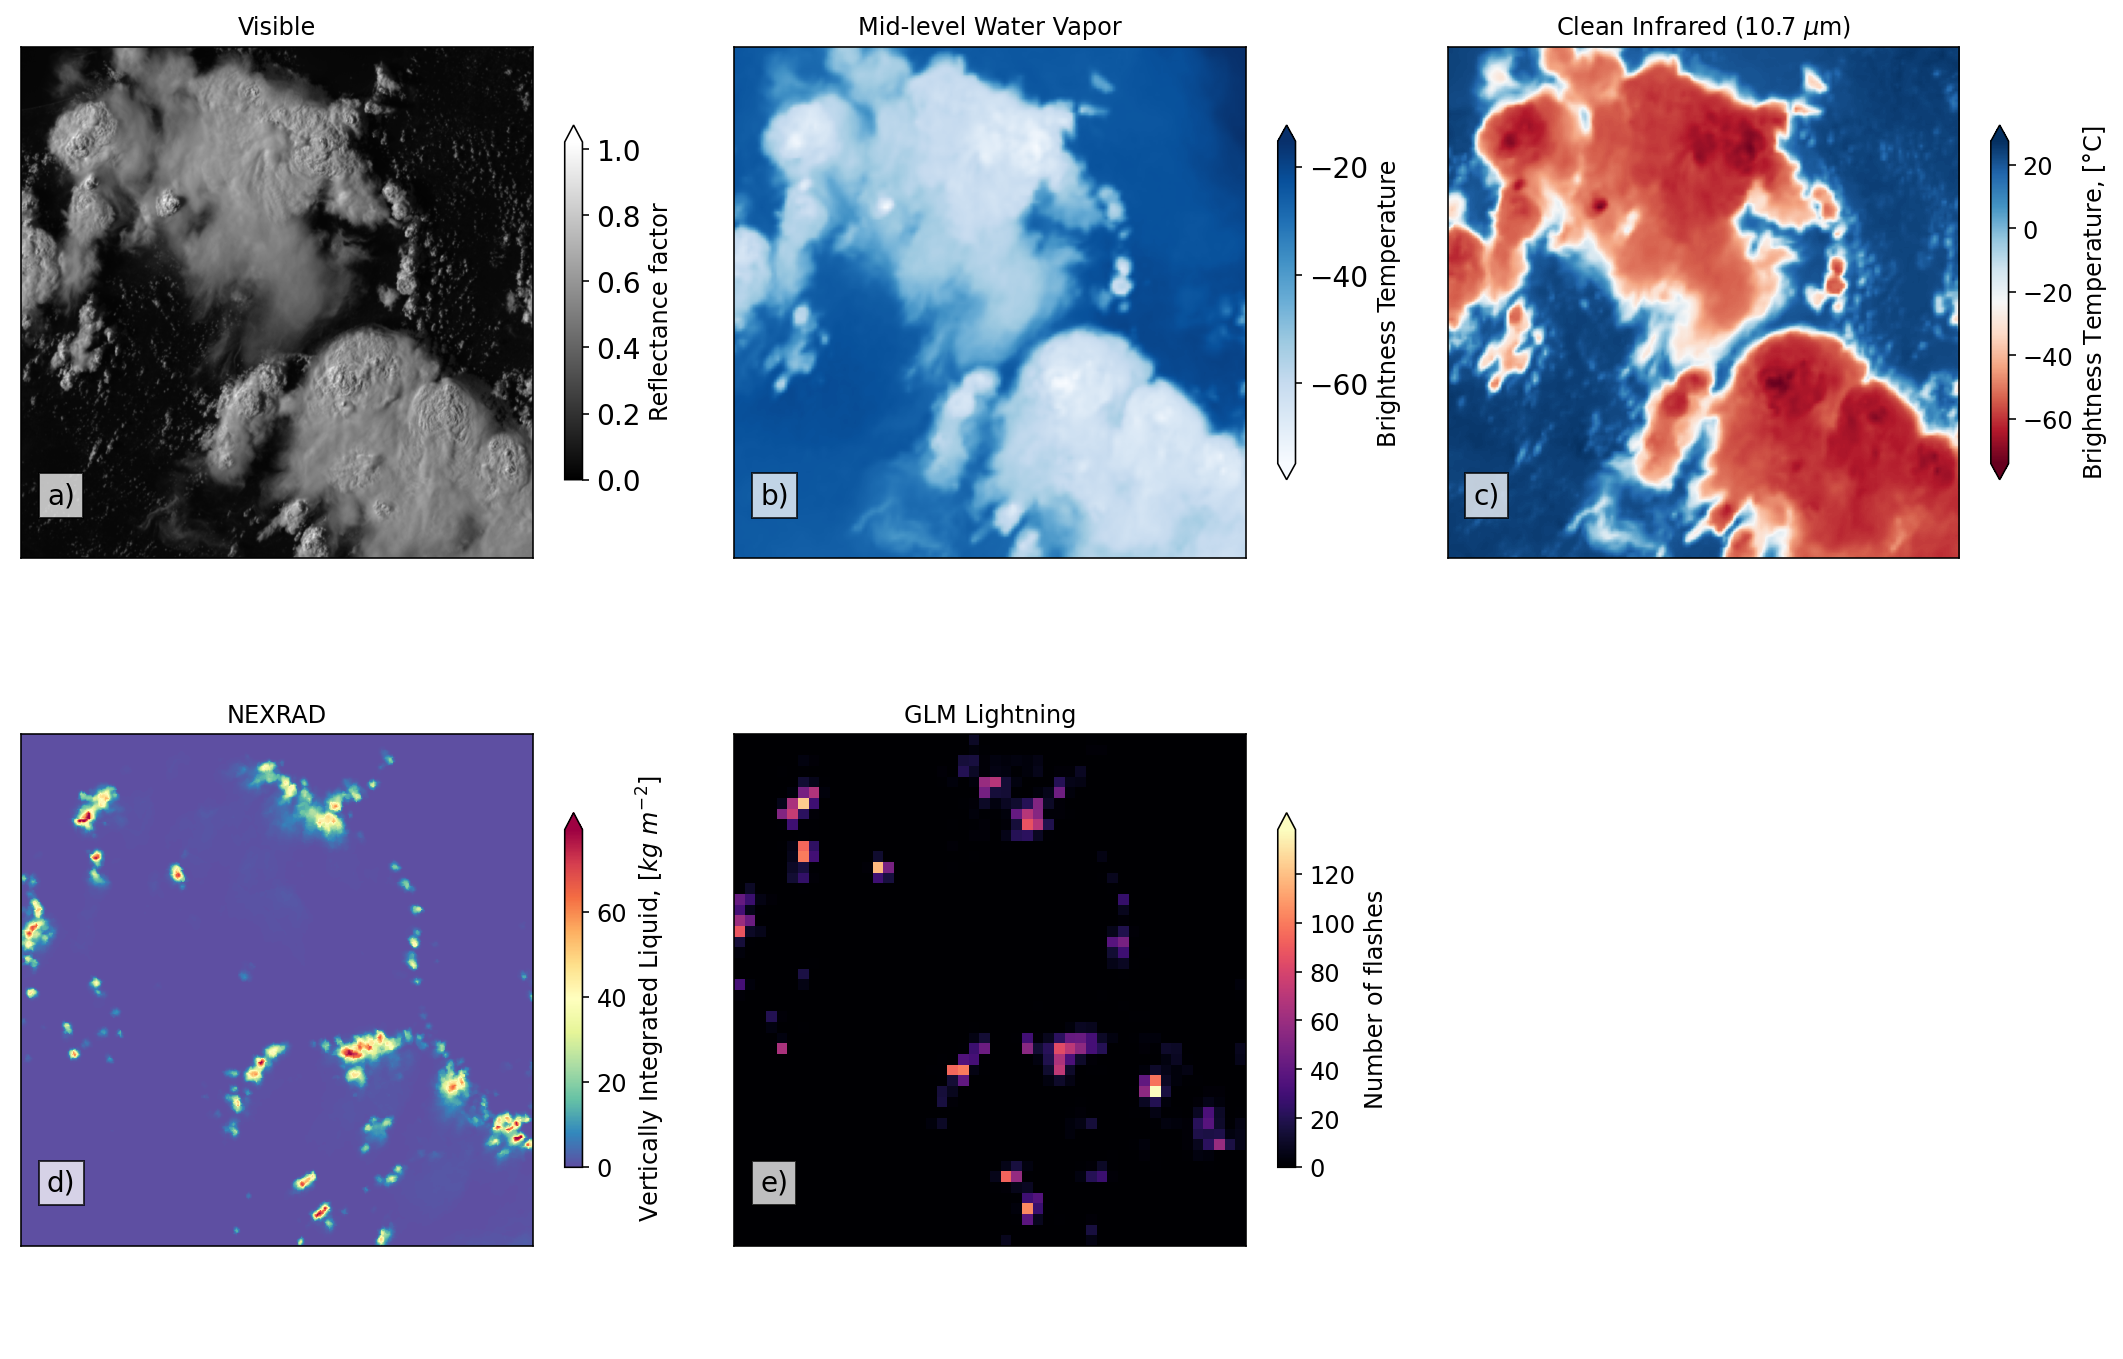

In [10]:
## Calling the function "plot_attributes" on various time steps to visualize more data attributes
plot_attributes(1)

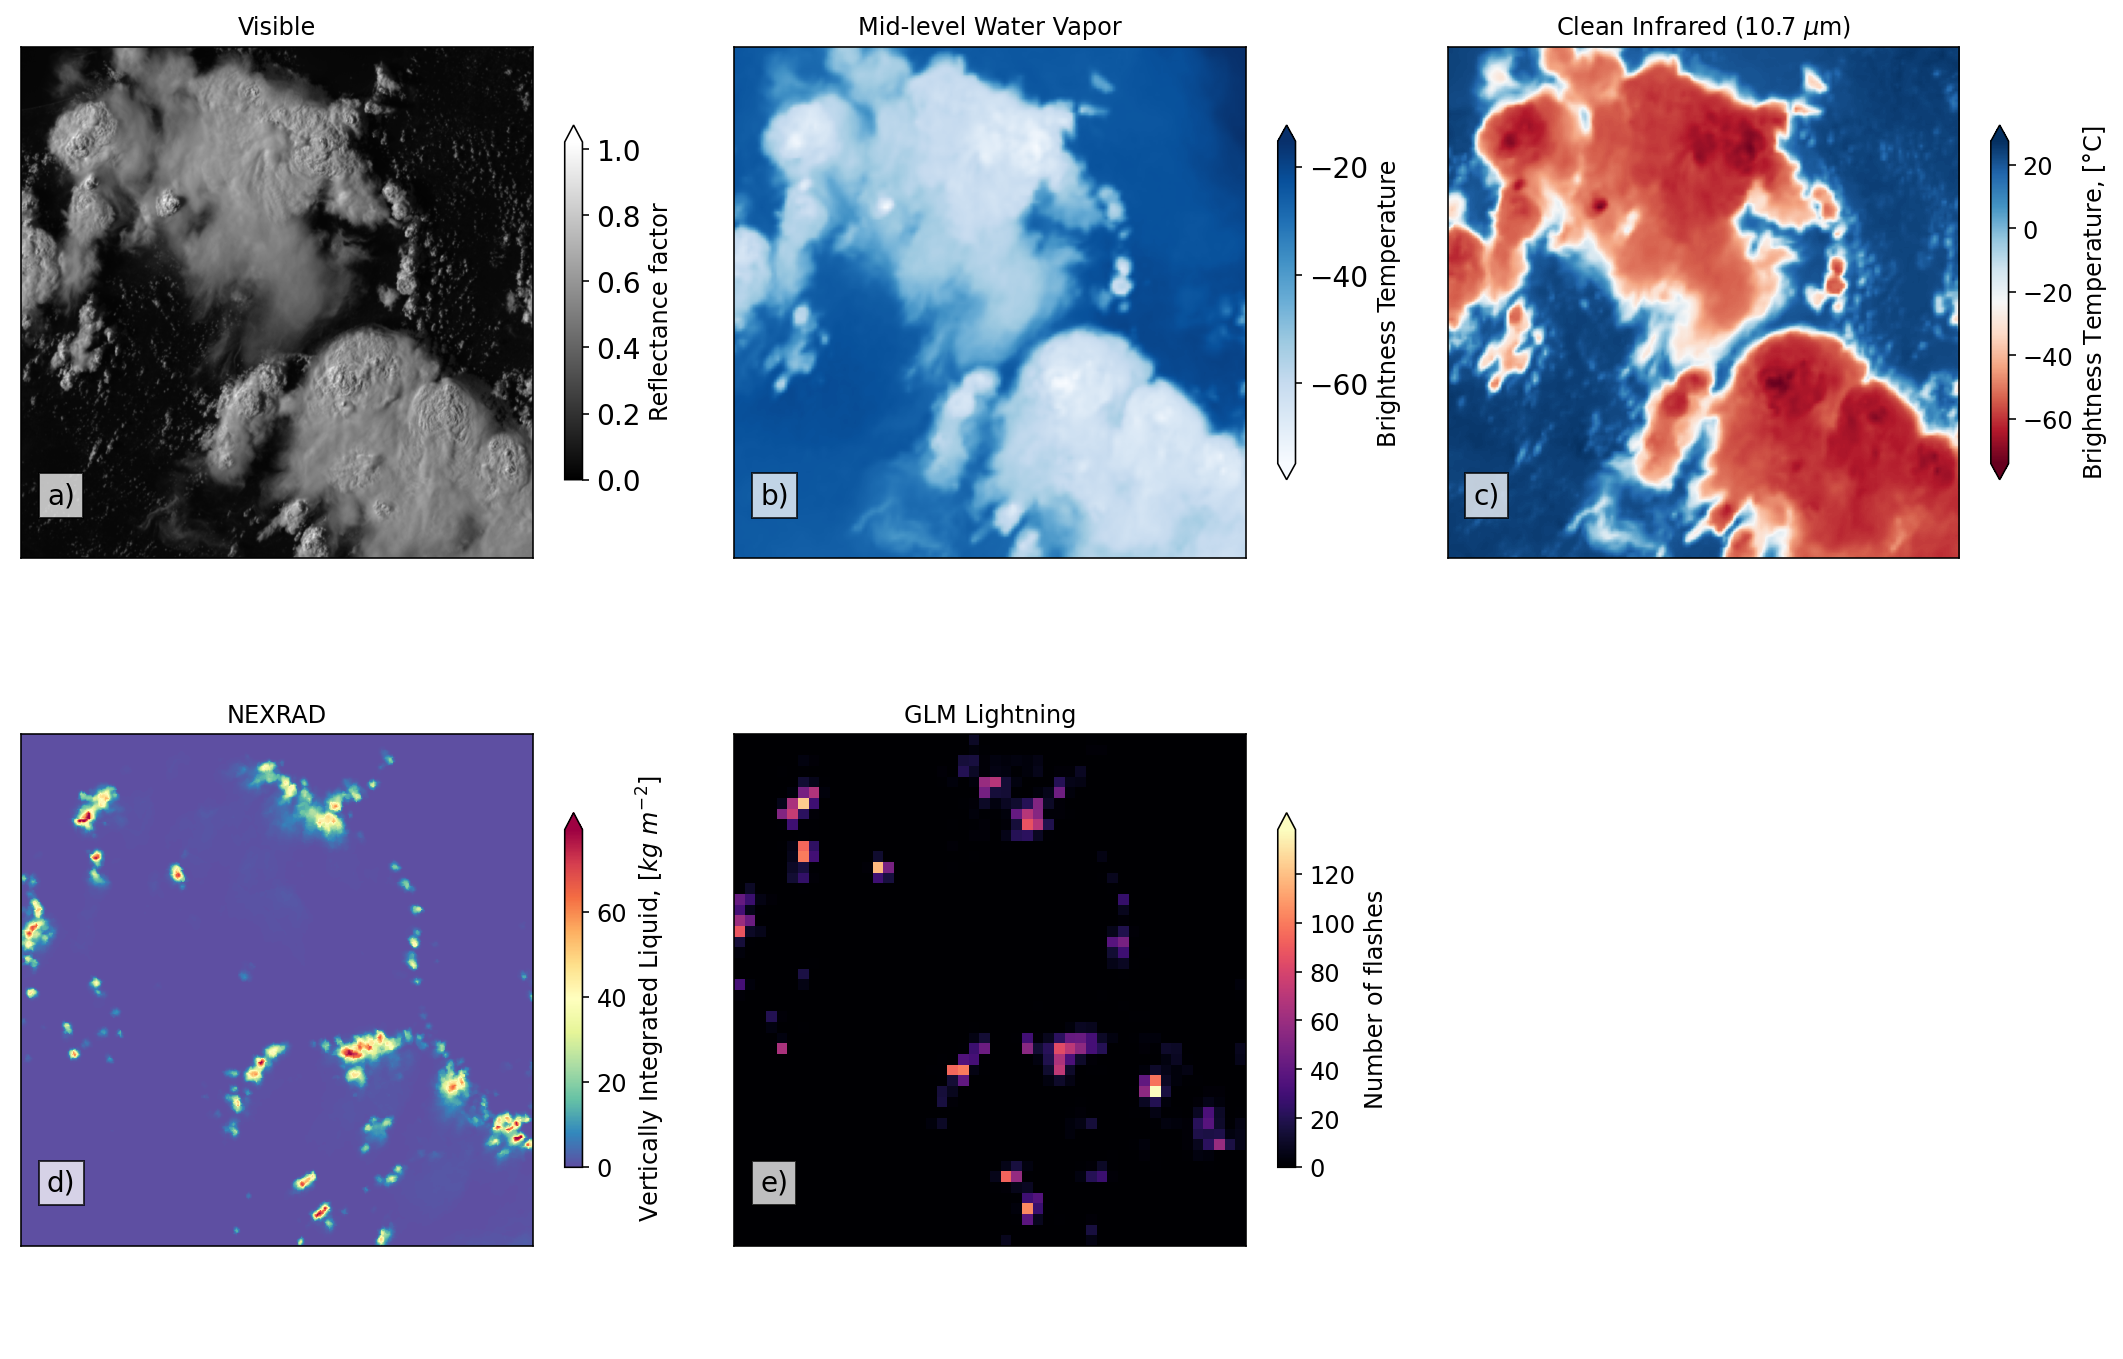

In [11]:
plot_attributes(2)

# Feature Engineering

> Before we deep dive into feature engineering, We will remind ourselves of the ML task we want to accomplish in this notebook.

  * Does the image contain a thunderstorm?

> This will be essentaial to when choosing the necessary values we calculate from the images. 

> For those who have gone through the paper thoroughly, it is assumed that we do not have the GOES Lightning mapper available for us to give lightning. Instead our primary aim will be to predict what the GOES lightning mapper measures. 

> the default images here are MODIS as such another potential use would be to train a model without the radar data and then make use of the resulting model on the MODIS Sensor (A sensor that has been collecting global measurements since 1999). 






> Let us look at how many total pixels are there in our dataset without re-gridding.

In [12]:
print(f"Total number of pixels: {dataset.x.shape[0]**2 + dataset.x2.shape[0]**2 + dataset.x3.shape[0]**2 + dataset.x4.shape[0]**2}")

Total number of pixels: 776448


> It is quite evident that we have a enormous number of pixels nearly three quarters of a million predictors. Hopefully, this illustrate why we have choosen to extract particular statistics from each variable and make use of them instead.

> Choose Percentiles: In Machine Learing it is sometimes tempting to use a single metric from each image, but let us take a moment and think about the data from meteorological point of view.

> There are few important characterstics of the data we need consider:


  *  Visible reflectance is larger with thicker storms (deeper storms)

  *   Visible reflectance is low with the surface.

  *  Water vapor brightness is low with thicker storms, colder surface temperatures.

  *  Water vapor brightness is higher with thinner storms, larger surface temperatures.
  
  *  Clean IR channel is similar to Water Vapor.

  *  Vertically integrated liquid is larger with stronger updrafts.

  
> Analyzing the above list it is clear that in generl storms are more likely to contain lightning if they are taller and more intense. As such, we need a range of percentiles to encompass each one of the above listed storm properties.

  


In [13]:
# Visualizing the values of the first time step and the second time step, dataset_sub is a subset of the main dataset
dataset_sub = dataset.isel (t=0) # xarray.isel returns a new dataset with each array indexed along the dimensions, more info on https://docs.xarray.dev/en/stable/generated/xarray.Dataset.isel.html

# Locating the visible image with the usual scaling
data_array = dataset_sub.visible * 1e-4

# As mentioned above creating a list of the percentiles to be calculated
percentiles= np.array([0,1,10,25,50,75,90,99,100])

# Numpy has a built in function to calculate the percentiles 
perc = np.nanpercentile(data_array,percentiles,axis=(0,1))

print(f"The respective percentiles are: {perc}")

The respective percentiles are: [0.0132     0.0215     0.0325     0.0423     0.1962     0.47499999
 0.55979997 0.68379998 1.02189994]


> As always to make sure the statistics we have chosen make sense, it is better visualize it.

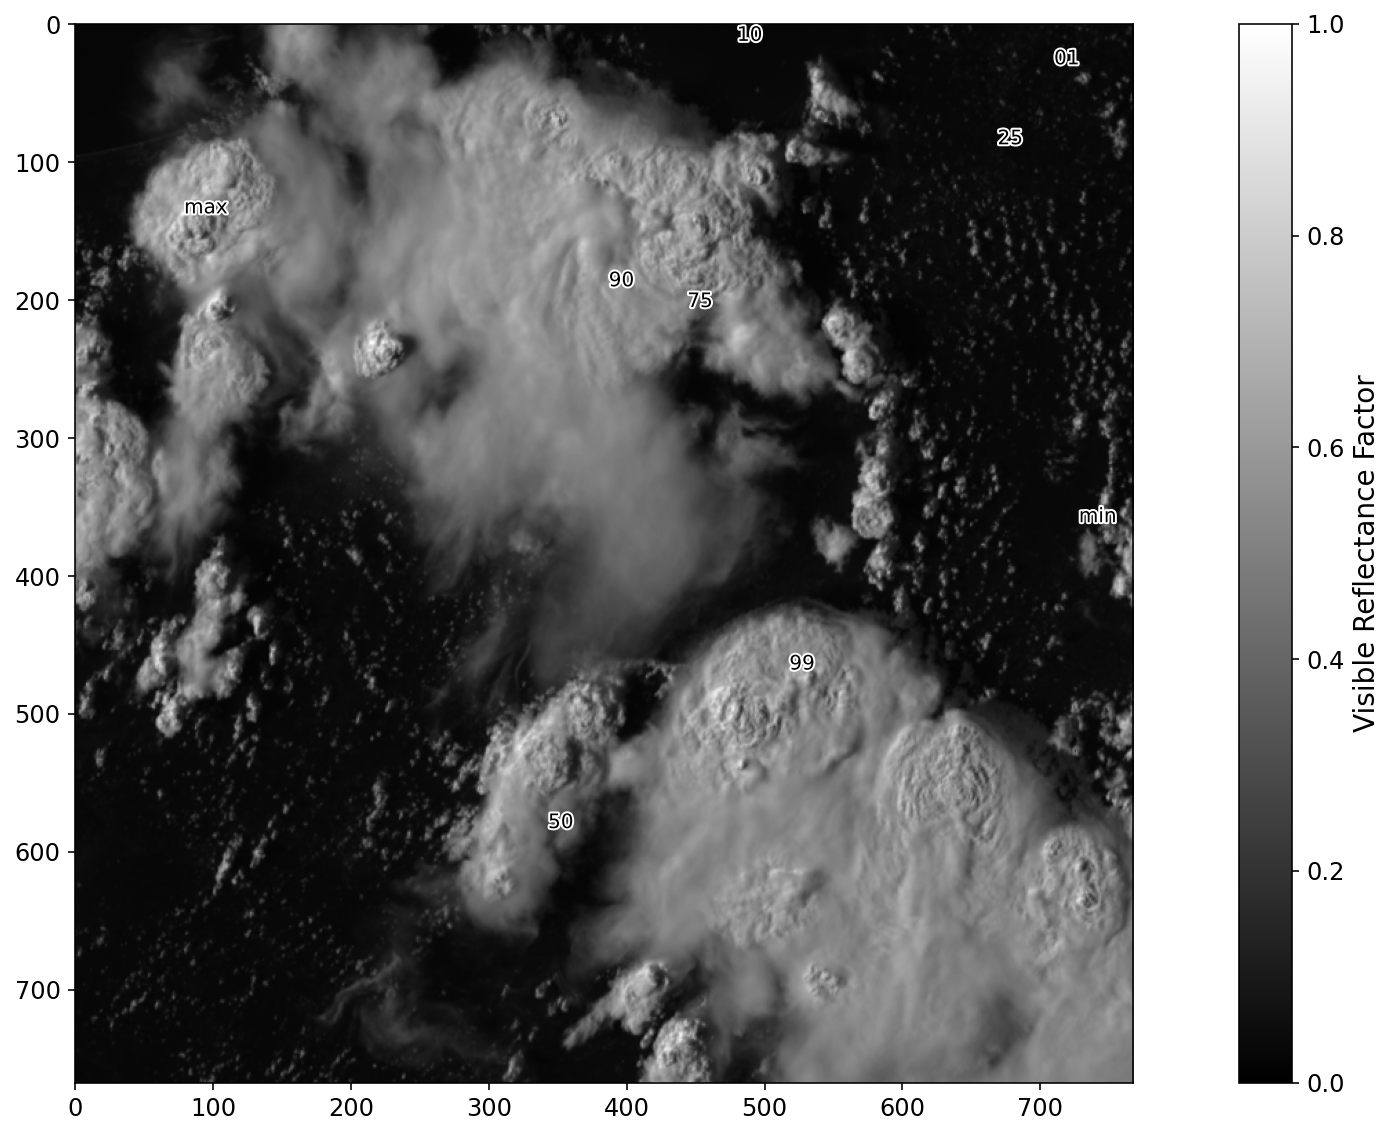

In [14]:
plt.figure(figsize=(15,8))
plt.imshow(data_array, cmap='gray', vmin=0, vmax=1)
plot_feature_loc(data_array, plt.gca())
plt.colorbar(label="Visible Reflectance Factor")
plt.tight_layout()

> After processing the dataset, it is in the best practice to make sure there are no spurious data points. In this dataset, let us take a look the water vapor attribute.

> Each of the attribute gets its own comma separated values (CSV) files. These files can be found in datasets folder in the repo. To elaborate more on the csv files, the first column is describes the datetime, then next corresponding 9 columns describe the percentiles that are labeled with `q_` and finally the last column describes the storm event.

> To load and process the CSV files that pertain tabular data, we will use the `pandas` library

In [15]:
# Using 'pd_read_csv' to load the csv file and index the dataframe on the first column to make slicing easier
wv_df = pd.read_csv('https://raw.githubusercontent.com/AnupDesai/Machine_Learning_Tutorial_Op_Meterology/main/datasets/sevir/WV_stats_master.csv', index_col=0, low_memory=False)

> Taking a look at the  data points, we can observe that data points are too large to be a temperature data point in (degC).

> The authors of the SEVIR paper have performed the multiplication of 100 to avoid this scalar offset, we are calculating percentiles (except event column) as such in our case we need to multiply by 10^-2

In [16]:
dict_keys = list(wv_df.keys()[:-1])
wv_df[dict_keys] = wv_df[dict_keys] * 1e-2
wv_df.head() 

q000     q001   q010     q025   q050   q075    q090  \
2018-03-22 14:10:00 -61.49 -60.3700 -58.53 -57.0700 -54.98 -53.06 -49.970   
2018-03-22 14:15:00 -61.67 -60.3200 -58.47 -57.1000 -54.99 -52.95 -49.890   
2018-03-22 14:20:00 -61.88 -60.3037 -58.46 -57.1125 -54.99 -52.68 -49.493   
2018-03-22 14:25:00 -61.91 -60.2500 -58.48 -57.1200 -54.98 -52.46 -48.940   
2018-03-22 14:30:00 -62.01 -60.1800 -58.40 -57.1600 -55.06 -52.34 -48.330   

                        q099   q100 event  
2018-03-22 14:10:00 -36.3763 -33.25   NaN  
2018-03-22 14:15:00 -36.9563 -32.95   NaN  
2018-03-22 14:20:00 -37.4200 -33.46   NaN  
2018-03-22 14:25:00 -37.5163 -33.58   NaN  
2018-03-22 14:30:00 -37.1163 -34.15   NaN

In [17]:
wv_df= wv_df.where(wv_df.q000 > -100)
wv_df.describe()

q000           q001           q010           q025  \
count  618991.000000  618991.000000  618991.000000  618991.000000   
mean      -57.094315     -52.226642     -46.171117     -41.440452   
std        12.576888      12.062991      11.812422      11.176875   
min       -90.990000     -81.920000     -77.410000     -73.440000   
25%       -66.890000     -61.490000     -54.960000     -49.530000   
50%       -57.760000     -53.293700     -46.610000     -40.720000   
75%       -49.350000     -44.450000     -37.280000     -32.740000   
max       -11.980000     -11.630000     -10.330000      -8.600000   

                q050           q075          q090           q099  \
count  618991.000000  618991.000000  618991.00000  618991.000000   
mean      -35.875863     -31.186876     -28.20472     -25.287367   
std         9.858592       8.323587       7.26341       6.273151   
min       -71.030000     -68.260000     -67.28000     -64.530000   
25%       -42.070000     -35.420000     -32.15300     -29.140000   
50%       -34.250000     -30.160000     -27.57000     -24.900000   
75%       -28.860000     -25.580000     -23.36000     -21.050000   
max        -7.460000      -5.950000      -5.05000      -3.910000   

                q100  
count  618991.000000  
mean      -23.898263  
std         5.852912  
min       -60.540000  
25%       -27.690000  
50%       -23.620000  
75%       -19.920000  
max        12.390000

> Although pandas is a great tool for visualizing the tabular dataset, it is better to visualize the dataset using a pictorial representation.

> Plotting the histograms to visualize the data - Make 50 bins that are evenly spaced form -100 degC to 0 degC

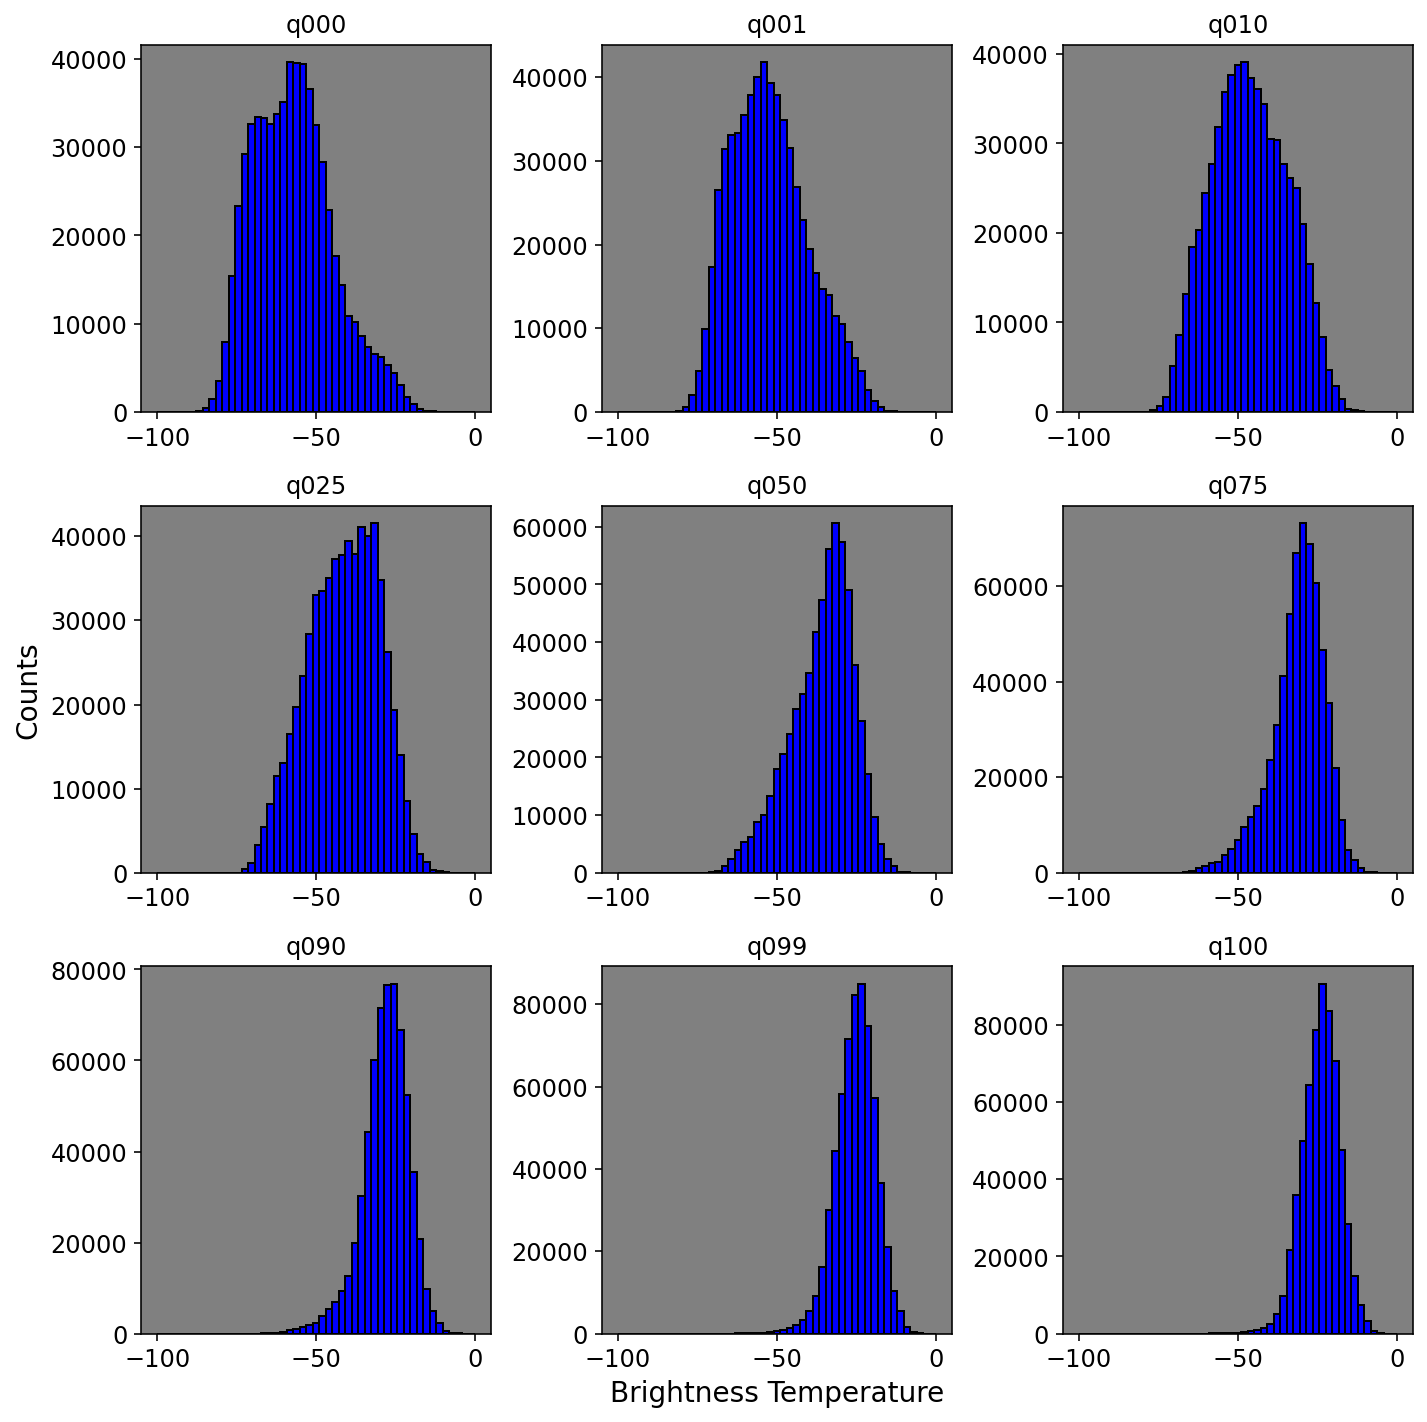

In [18]:
# Define the bins
hist_bins = np.linspace(-100,0)

# Define color spectrum for the histogram
color = [126/255,131/255,248/255]

# Plot the histograms
figure,axes = plt.subplots(3,3,figsize=(10,10))
axes= axes.ravel()

# Run a for loop over all the columns
for val,ax in enumerate(axes):
  temp = dict_keys[val]
  ax.hist(wv_df[temp], bins=hist_bins, color='b',edgecolor='k')
  ax.set_title(temp)

axes[3].set_ylabel('Counts')
axes[7].set_xlabel('Brightness Temperature')

plt.tight_layout()


# Splitting dataset - Train/Val/Test

> This section describes one of the most important steps in Machine Learning - splitting the dataset into train, validation and test subsets. Although the paper delves deep into this concept, we perform this action to make sure that our model does not get a taste of the complete dataset and straight out overfits the data and also adjust our hyperparameters.

In [19]:
## Loading the data from the csv file as we have done in the above section to visualize Minimum Infrared Brightness
if_df = pd.read_csv("https://raw.githubusercontent.com/ai2es/WAF_ML_Tutorial_Part1/main/datasets/sevir/IR_stats_master.csv",low_memory=False,index_col=0, parse_dates=True)

# Scaling the dataframe
dict_keys = list(if_df.keys()[:-1])
if_df[dict_keys] = if_df[dict_keys] * 1e-2
if_df= if_df.where(if_df.q000 > -100)
if_df = if_df.sort_index()
if_df.head()

q000   q001   q010   q025   q050   q075    q090    q099  \
2018-02-04 16:40:00 -61.31 -59.45 -55.30 -52.59 -47.00 -36.92 -26.560 -4.4163   
2018-02-04 16:45:00 -61.90 -59.13 -55.37 -52.52 -47.68 -38.00 -26.753 -6.9400   
2018-02-04 16:50:00 -61.16 -58.93 -55.35 -52.55 -48.17 -39.07 -27.013 -8.8400   
2018-02-04 16:55:00 -61.63 -58.87 -55.38 -52.68 -48.34 -40.16 -27.030 -8.9163   
2018-02-04 17:00:00 -61.67 -58.82 -55.42 -52.81 -48.38 -40.75 -27.240 -9.0526   

                      q100              event  
2018-02-04 16:40:00  15.19  Thunderstorm Wind  
2018-02-04 16:45:00  15.32  Thunderstorm Wind  
2018-02-04 16:50:00  15.62  Thunderstorm Wind  
2018-02-04 16:55:00  14.27  Thunderstorm Wind  
2018-02-04 17:00:00   6.57  Thunderstorm Wind

>**Temporal Split**: It is always in the best practice to split meteorological dataset using time. The dataset/dataframe that we built in the above section has the first column encoded as `datetimes`. This makes it easier selection easier.


In [20]:
## Splicing the data using the splice function, time_split will give subset of data from September 2018
time_split = slice('2018-09-01', '2018-10-01')
df_time = if_df[time_split]
df_time.index.min(), df_time.index.max()

(Timestamp('2018-09-01 00:00:00'), Timestamp('2018-10-01 21:30:00'))

> Now, we can visualize the infrared brightness brightness on a monthly basis using `groupby` method from pandas which will allow us to group all the data by the month.

> For more info on groupby visit: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

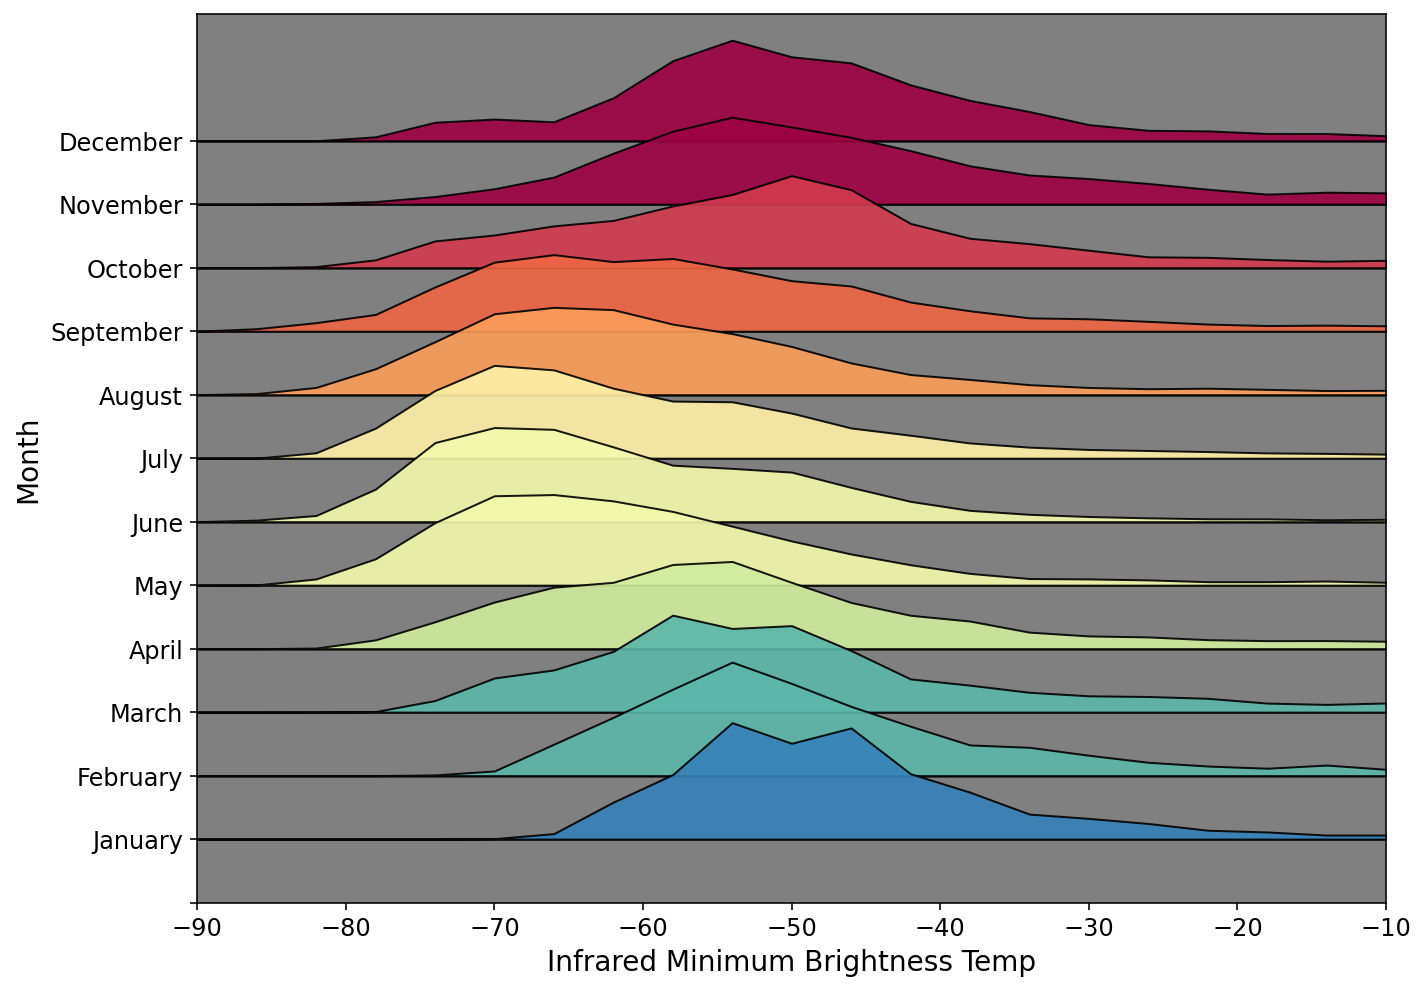

In [21]:
group = if_df.q000.groupby(if_df.index.month)
# Reversing the series for plotting purposes
group= list(group)
group= group[::-1]

## Prepare to plot histograms
bin= np.arange(-100,0,4)
mid= np.arange(-98,-2,4)
color_map= mp.cm.Spectral_r 
boundaries= np.arange(0,1.3,0.1)
norm= mp.colors.BoundaryNorm(boundaries, color_map.N) # BoundaryNorm generates a colormap index based on discrete intervals.
scalarMap= mp.cm.ScalarMappable(norm=norm, cmap=color_map)  # ScalarMappable normalizes the data before returning RGBA values from the colormap


## Plot histograms
figure = plt.figure(figsize=(10,7))
figure.set_facecolor('w')
ax = plt.gca()

for idx,gr in group:
  c,b = np.histogram(gr.values, bins=bin)
  c = c/c.sum() # normalize the data
  ax.axhline((idx/10), color='k', zorder=0, alpha=0.5) #Add a horizontal line across the Axes.
  ax.fill_between(mid,(idx/10),c+(idx/10),alpha=0.9,facecolor=scalarMap.to_rgba((idx/10)), edgecolor='k') # Fill the area between two horizontal curves.

ax.set_xlim([-90,-10]) # Set x-axis limits
ax.set_ylim([0.05,1.4]) #set y-axis limits
ax.set_yticks(np.arange(0,1.3,0.1)) # to show ticks for each group
ax.set_yticklabels(['', 'January','February','March','April','May','June','July','August','September','October','November','December'])
# Label the x and y axis
ax.set_xlabel('Infrared Minimum Brightness Temp')
ax.set_ylabel('Month')

plt.tight_layout()

> It is observed that, the summer months have colder cloud tips in the images which indicates stronger storms

> Its time to split the data as promised. Firstly, we will perform the temporal split of the dataset. Usually, the dataset is divided into training and val/test data to avoid overfitting.

> We will follow the norm of split used in the paper 
  *   training : 2017-01-01 through 2019-06-01
  *   val/test : 2019-06-01 through 2019-12-31 



In [22]:
# set random seed 
np.random.seed(seed=42)
# Training data split
train_time_split = slice('2017-01-01','2019-06-01')
# convert the slice object into dataframe
df_train_time = if_df[train_time_split]

# Test split
test_time_split = slice('2019-06-01','2019-12-31')
df_test_time = if_df[test_time_split]

# Prepare list of indices
index = np.arange(0, df_test_time.shape[0])
# pick random indices for validation set and keep aside the rest for test set
index_v = np.random.choice(index, size=int(index.shape[0]/2),replace= False) 
index_v.sort()
index_t = np.setdiff1d(index, index_v)

df_val = df_train_time.iloc[index_v]
df_test = df_train_time.iloc[index_t]

# Let us take a look at the shapes of validation and test sets to make sure we have equal a split
print(f"Shape of validation set: {df_val.shape[0]}")
print(f"Shape of test set: {df_test.shape[0]}")

Shape of validation set: 86338
Shape of test set: 86338


> **Random Split** : Apart from specifically splitting data on a particular attribute usually the dataset is split randomly in parts. The Scikit-Learn library has a pre-built function to perform this task for us. 

> `train_test_split` - This pre-built function takes in input a numpy matrix of shape (n_samples, n_features) which is commonly denoted as X and the ouput data (ie. labels) which is commonly denoted by y. 


> Let us play with a simple data before applying the train_test_split to our bigger SEVIR dataset

In [23]:
from sklearn.model_selection import train_test_split
# Create toy X and y to perform the split
X,y = np.arange(20).reshape((10,2)), np.arange(10)
print(f"X and y before the split: {X.shape,y.shape}")

#Split X and y using train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X and y before the split: ((10, 2), (10,))
X_train: (6, 2), y_train: (6,)
X_test: (4, 2), y_test: (4,)


> Now, we have a better understanding on how to randomly split a given dataset. Let us go ahead and split the SEVIR dataset randomly similarly using `train_test_split`

> In above cell, we looked at an example we considered two numpy arrays as our input data and output data (i.e labels),but here, we have a pandas dataframe, so we need to convert the dataframe into numpy array and then apply the split

In [24]:
## Creating our input : X
# Dropping the event column as its an non-numeric attribute and it is something we dont need
df_dropevent = if_df.drop(columns='event')
# Create a numpy matrix
X = df_dropevent.to_numpy()


# Creating our labels: y
# Load the label numpy matrix, here the labels are GLM flashes, as we considering the number of flashes to predict thunderstorms/no thunderstorms
df_lbl = pd.read_csv('https://raw.githubusercontent.com/ai2es/WAF_ML_Tutorial_Part1/main/datasets/sevir/LI_stats_master.csv', index_col=0,low_memory=False, parse_dates=True)
y = df_lbl.c.values

## Applying train_test_split to split the data 
X_train,X_other,y_train,y_other = train_test_split(X,y,test_size=0.33, random_state=42)

# Further splitting our test data into a validation set
X_val,X_test,y_val,y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

# Print shapes to confirm the split
print(f"X_train : {X_train.shape}, X_val : {X_val.shape}, X_test: {X_test.shape}")

X_train : (414872, 9), X_val : (102170, 9), X_test: (102171, 9)


> The above cell depicts the split of data using a single variable `GLM flashes` but we have three other variables consider. To do this we will use a helper function `load_n_combine_df` from aux_functions.py script.

In [25]:
(X_train,y_train),(X_validate,y_validate),(X_test,y_test) = load_n_combine_df(path_to_data='/content/',features_to_keep=np.arange(0,36,1),class_labels=True)

# Looking at the shape of each X_train,X_val and X_test
X_train.shape,X_val.shape,X_test.shape                                                        

((446307, 36), (102170, 9), (89716, 36))

# Simple Classification Task

> Before we jump into details of Machine Learning, we will recall the task to be accomplished in this notebook: **Classification**

  > Does a image from the SEVIR dataset contains a thunderstorm?

> To perform this Machine Learning task we wil use the ubiquitous `scikit-learn` also known as `sklearn` python package.

> Scikit-learn package has abundant resources to be used for various Machine Learning tasks. Additionally, the documentation on each method is detailed and extensive.

> As sklearn is a python package, all its methods and models have similar syntax. They follow a similar workflow as follows:

  * Create/load input data in shape of `[n_samples,n_features]`, commonly represented as `X`.
  
  * Create/load output data in shape of `[n_samples]`, commonly represented as `y`.
  
  * Initialize a model using just `()` at the end of the model name
  
  * Fit the model using `.fit(X,y)` method on the initialized model

  * Evaluate the model that has been fit to get the predictions in case of tasks like classification using `.predict(X_val)` or `.predict.proba(X_val)`.


> The above workflow is generally the norm of a Machine Learning task and scikit-learn package allows us to model this workflow in a pipeline with a few lines of code.










> Now, that we have a basic workflow in place, let us put this into action using and perform the classification task using a single input predictor from the paper.

In [26]:
(X_train,y_train),(X_validate,y_validate),(X_test,y_test) = load_n_combine_df(path_to_data='/content/',features_to_keep=np.arange(0,1,1),class_labels=True)
# Looking at the shape of each set to make sure that they match what we expected
print('X_train, y_train shapes: {},{}'.format(X_train.shape,y_train.shape))
print('X_val, y_val shapes: {},{}'.format(X_validate.shape,y_validate.shape))
print('X_test, y_test shapes: {},{}'.format(X_test.shape,y_test.shape))                                       

X_train, y_train shapes: (446320, 1),(446320,)
X_val, y_val shapes: (82871, 1),(82871,)
X_test, y_test shapes: (89718, 1),(89718,)


> Now, let us try gauge the predictive power of the minimum brightness temperature from the infrared channel. To perform this action, we need to find the data samples that have lightning flashes and samples which do not.

> We will use the `np.where` function from numpy to find indices of `X` and `y` where the label is 1.

In [27]:
# Sort out samples with atleast 1 flash
idx_flash = np.where(y_train==1)[0]
# Sort out samples without flashes
idx_noflash = np.where(y_train==0)[0]

> For folks who have never used `np.where` before, visualizing the data is the best way to find out whether `idx_flash` and `idx_noflash` is working as expected.

(array([224262.,      0.,      0.]),
 array([-0.01,  0.01,  0.99,  1.01]),
 <BarContainer object of 3 artists>)

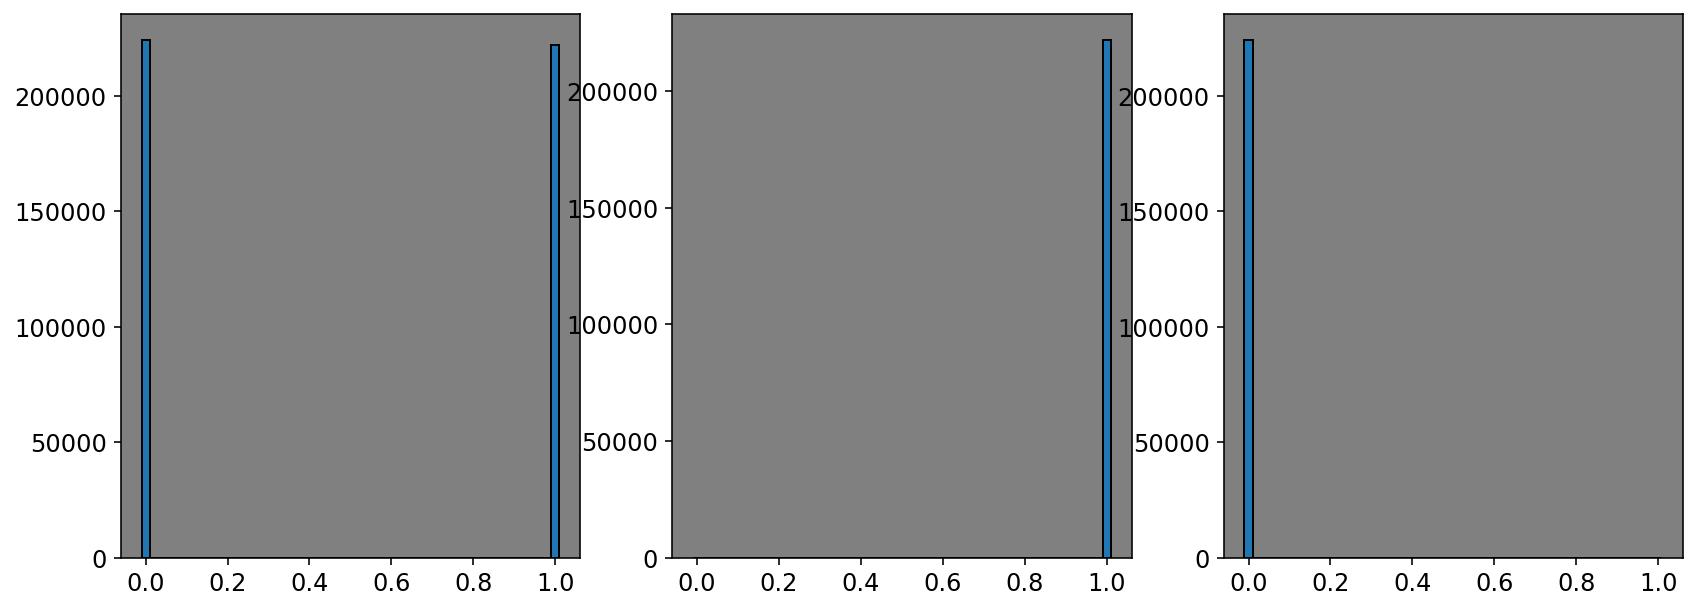

In [28]:
# The numpy function np.where theoretically gives us the results, but better we visualize it
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.hist(y_train,bins=[-0.01,0.01,0.99,1.01], edgecolor='k')

plt.subplot(1,3,2)
plt.hist(y_train[idx_flash], bins=[-0.01,0.01,0.99,1.01],edgecolor='k')

plt.subplot(1,3,3)
plt.hist(y_train[idx_noflash], bins=[-0.01,0.01,0.99,1.01],edgecolor='k')

> Now that things look to be working properly, on a meteorological stand point let us plot the histogram of brightness temperature. 

> What is the expectation here ?

> The expectation here is that images with flashes will generally have colder minimum temperatures as they will have stronger storms.

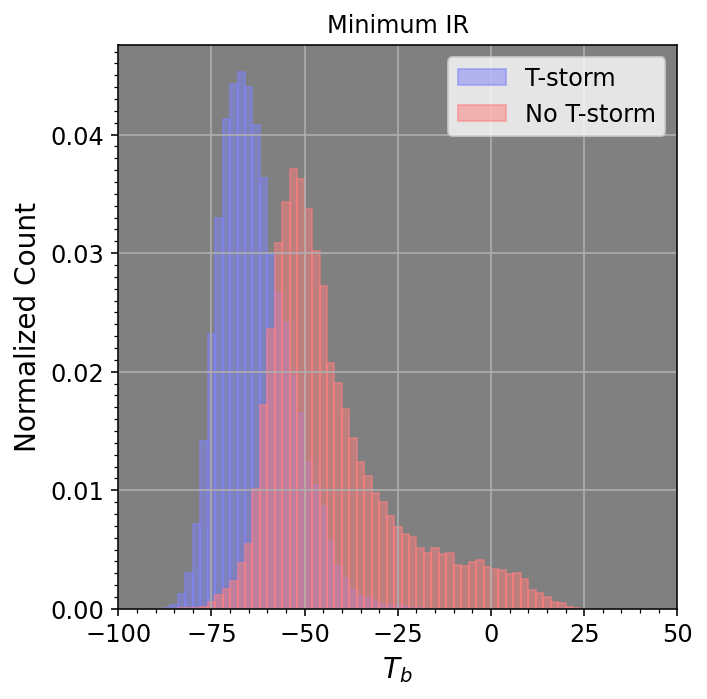

In [29]:
# Place ticker where we want them to be placed
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,AutoMinorLocator

# Create an array of bins to create the histograms
xbins = np.arange(-100,50,2)

r= [255/255, 127/255, 127/255]
b = [126/255, 131/255, 248/255]

# Create the figure
figure= plt.figure(figsize=(5,5))
figure.set_facecolor('w')

#create axis for drawing
ax= plt.gca()

#draw histograms on the axis using matplotlib's histogram function
ax.hist(X_train[idx_flash,0], density=True, bins=xbins, color=b, alpha=0.5, zorder=0, label='T-storm', edgecolor=b)
ax.hist(X_train[idx_noflash,0], density=True, bins=xbins, color=r, alpha=0.5, zorder=0, label='No T-storm', edgecolor=r)

# add title and axis labels
ax.set_title('Minimum IR')
ax.set_ylabel('Normalized Count')
ax.set_xlabel('$T_{b}$')

# Set the tick locations using the above import functions
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.001))

# Set axis limit
ax.set_xlim([-100,50])
ax.grid('on')
ax.legend()

plt.tight_layout()

> The above histogram, follows our expectation, there seems to a decision boundary to separate the two classes. 

> Time to train a logistic regression model now!

In [30]:
# Load model from sklearn
from sklearn.linear_model import LogisticRegression

#initialize the model
model = LogisticRegression()

print(model)

LogisticRegression()


> Time to fit the model and obtain the predictions by using `.predict` function from sklearn.



In [31]:
# Time to train the model
model = model.fit(X_train,y_train)
y_preds= model.predict(X_validate)

> Time to evaluate the metrics from the above model.

  1. To evaluate the metrics let us build a contigency table as shown below.


> 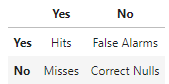



2. To provide a description on the above table, the left column is the model predictions and the top row is the observations.
    *   `True Positive`: if the model and observation predict `Yes`
    *   `False Positive`: if the model predicts `Yes` but the observation is `No`
    *   `False Positive`: if the model predicts `No` but the observation says `Yes`
    *   `True Negative`: if the model predicts `No` and the observation is `No`
    





> We will be using helper functions from gewitter_functions.py to obtain the contigency table and other metrics. There functions were written by Dr. Lagerquist during his PhD studies. 

> This notebook is about introducing Machine Learning hence, we will adapt these helper functions to run out of the box.

> We will also calculate the accuracy metric using `get_acc` function, from gewitter_functions.py

> Accuracy is generally calculated as 

>>>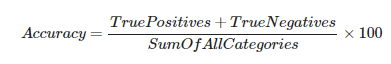

In [32]:
from gewitter_functions import get_contingency_table,get_acc,get_pod,get_sr,csi_from_sr_and_pod, make_performance_diagram_axis

cont_table = get_contingency_table(y_validate,y_preds)
print(f"Contigency Table : {cont_table}")

accuracy = get_acc(cont_table)
print(f"accuracy = {np.round(accuracy,0)}")


Contigency Table : {'num_true_positives': 36370, 'num_false_positives': 9695, 'num_false_negatives': 6353, 'num_true_negatives': 30453}
accuracy = 81.0


> 81% accuracy is a good result, as we are using 1 input. But as pointed out in the paper, it is always helpful to use more than one evaluation metric.

Performance Diagram: 

> The performance diagram has to be one of the most intuitive reprsentation of the model and its skills. 

> To provide a brief introduction to the folks who have never seen one, it is a diagram that plots `POD (Probability of detection)` vs `Success Ratio` with usually `CSI (critical success index)` as the colorbar. 

> To gauge how a model is performing better or worse from a performance diagram, look the helpful annotations in the following diagram. The better performing models usually end up in the top-right of the diagram. The worse perfoming model end up in top-left, bottom-right or bottom-left part of the diagram.

>>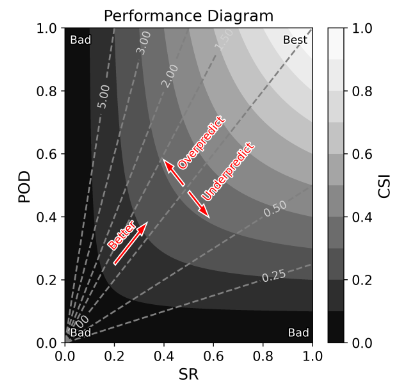

> As mentioned in the above cell, to plot this diagram we need to calculate two variables. `Probability of Detection (POD: y-axis)` and `Success Ratio (SR:x-axis)`. These can be caculated from the contigency table as follows.



>>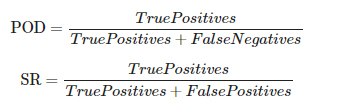

Similarly, we can calculate the `Critical Success Index` as follows:

>> 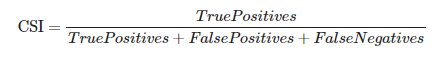

In [33]:
pod= get_pod(cont_table)
sr= get_sr(cont_table)
csi = csi_from_sr_and_pod(sr,pod)

print(f'POD : {np.round(pod,2)}, SR: {np.round(sr,2)}, CSI: {np.round(csi,2)}')

POD : 0.85, SR: 0.79, CSI: 0.69


> Now that we have calculated all the necessary variables, we can go ahead and plot the performance diagram for our own Logistic Regression model. To plot the diagram we will make use of a helper function `make_performance_diagram_axis` to keep this notebook intuitive.

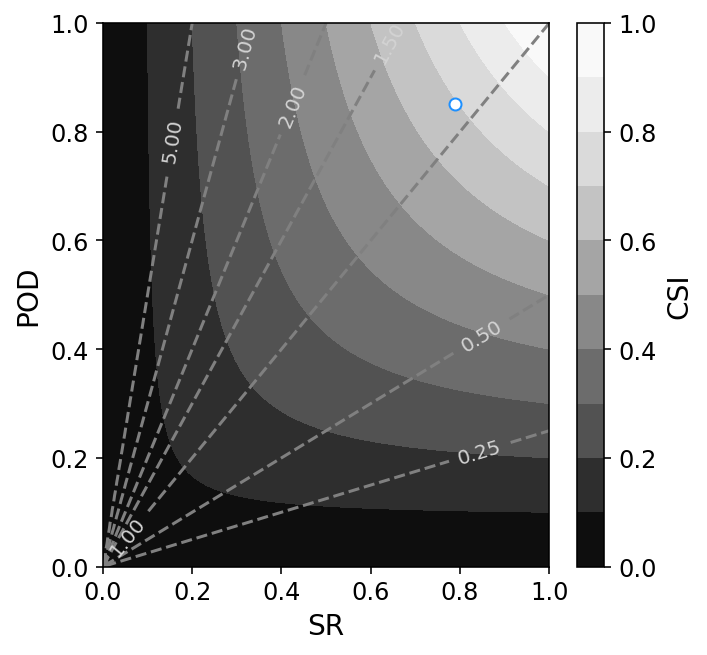

In [34]:
ax = make_performance_diagram_axis()
ax.plot(sr,pod,'o',color='dodgerblue',markerfacecolor='w')

> Here it is, the performance diagram of our Logistic Regression model, using the learning from up above, we can assess that our model is actually performing very well, with a large POD, SR and near the center line.

> Now, let us consider more than 1 predictor to help predict whether there are thunderstorms or no thunderstorms.

> Since, we are using more than 1 predictor it is in the best practice to normalize the predictors. Scaling or normalizing the predictor is quite important as in reality each one our inputs have a range of valid values asssociated with them and the range can be as large as (-100,100) or as small as (0,1). 

> The machine learning will take into consideration these inputs quantitatively, so if we use the default inputs it might be biased to use the larger magnitude predictors more than the small predictors. 

> To prevent the bias we will scale the data to have `0` mean and `1` variance. We are likely more familiar with the standard anomaly


>>>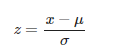

> We can write a helper function to implement the standard anamoly, but sklearn for the rescue again, sklearn has in built function for this: `sklearn.preprocessing.StandardScaler` which works a lot how we fit the machine learning model before.

In [35]:
(X_train,y_train),(X_validate,y_validate),(X_test,y_test) = load_n_combine_df(path_to_data='/content/',features_to_keep=np.arange(0,36,1),class_labels=True)

In [36]:
# Looking at the shape of each set to make sure that they match what we expected
print('X_train, y_train shapes: {},{}'.format(X_train.shape,y_train.shape))
print('X_val, y_val shapes: {},{}'.format(X_validate.shape,y_validate.shape))
print('X_test, y_test shapes: {},{}'.format(X_test.shape,y_test.shape))       

X_train, y_train shapes: (446307, 36),(446307,)
X_val, y_val shapes: (82871, 36),(82871,)
X_test, y_test shapes: (89716, 36),(89716,)


In [37]:
from sklearn.preprocessing import StandardScaler

# Create the scaling object
scale = StandardScaler()

# Fit the Scaler to the training data
scale.fit(X_train)

# Transform the data 
X_train = scale.transform(X_train)
X_validate= scale.transform(X_validate)
X_test= scale.transform(X_test)

np.mean(X_train,axis=0), np.std(X_train,axis=0)

(array([ 4.56472368e-16,  3.53052847e-16,  2.49633326e-17,  6.47008825e-17,
         2.03782307e-18,  6.24083316e-17,  2.36132748e-16, -2.13971423e-16,
        -1.21250473e-16, -7.13238075e-17,  3.44901555e-16,  2.64916999e-16,
         8.86962492e-16, -2.30834408e-15, -4.03361604e-16,  3.12551114e-16,
         4.87803898e-16, -1.91810097e-16, -3.89733663e-17, -2.39444211e-16,
         2.79181761e-16,  1.12080269e-17,  1.46977989e-16,  6.58471580e-17,
        -1.54492462e-16,  1.64936305e-16, -8.58432969e-17, -8.66074806e-18,
        -1.29911221e-17,  2.98031624e-17, -1.96140471e-17, -3.13315297e-17,
        -4.83982980e-18,  7.20243092e-17,  2.62369721e-17,  1.23288296e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]))

In [38]:
# Initializing the maximum iterations to not get a warning about converging
scaled_model = LogisticRegression(max_iter=300)

# As we did for the above model we fit and get the predictions and the contigency table
scaled_model = scaled_model.fit(X_train,y_train)
y_pred = scaled_model.predict(X_validate)
cont_table = get_contingency_table(y_validate, y_pred)

# Looking up the dictionary
print(cont_table)

{'num_true_positives': 41265, 'num_false_positives': 4800, 'num_false_negatives': 3399, 'num_true_negatives': 33407}


In [39]:
# Calculating the accuracy

accuracy = get_acc(cont_table)
print(f'Accuracy = {accuracy}')

Accuracy = 90.10630980680817


POD : 0.92, SR : 0.9, CSI: 0.83


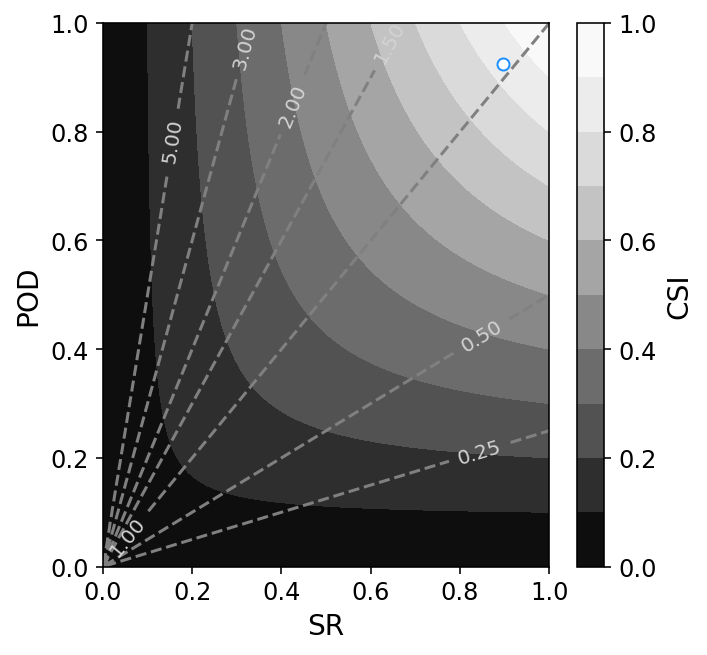

In [40]:
# To plot the performance diagram we need to calculate pod, sr and csi as we did for the above model

pod = get_pod (cont_table)
sr = get_sr (cont_table)
csi = csi_from_sr_and_pod(sr,pod)

# Looking up the results
print(f"POD : {np.round(pod,2)}, SR : {np.round(sr,2)}, CSI: {np.round(csi,2)}")

# Plotting the performance diagram using the above variables
ax = make_performance_diagram_axis()
ax.plot(sr, pod, 'o', color = 'dodgerblue', markerfacecolor='w')


> It is amazing to observe that we have improved the accuracy of the model by scaling the data and obtain a CSI more than 0.8.

> Until now, we have been using `model.predict` to predict and out the predictions. This function is actually doing something us under the hood, the `model.predict` implements `model.predict_proba` which outputs a probability of each class, for example an image does not contain thunderstorm or contains thunderstorm, then model.predict takes the max of the two columns of probabilities to assign the class. 

> To put it into simple words, if the probability of the class 0 (no thunderstorm) is less than 0.5, then the label would be predicted as 1, and if it was greater than 0.5 it would be predicted as 0. This is a good place to start, but it is not always the case sometimes it is better define our own threshold.

In [41]:
# Get the prediction probabilities
y_pred_proba = scaled_model.predict_proba(X_validate)

print(f"Probabilitiy: {y_pred_proba[0]}, Label: {y_preds[0]}")

Probabilitiy: [0.82710832 0.17289168], Label: 0


> It is observed that the predicted probabilities for the first example shows a prediction around 82% for no lightning while 17% for lightning. Thus, a threshold of 0.5, which is assumed by the `model.predict()` shows that label is indeed 0.

> Now, to create a line of threshold we will systematically change the threshold between 0 and 1. We can calcuate the contingency table for each threshold value and further calculate the variables POD and SR.

In [42]:
# Importing a tracking bar to progress
import tqdm

# Let us focus on the output from class 1 
y_predictions = y_pred_proba[:,1]

# choose your own thresholds which will make evenly spaced points between 0 and 1
thresh = np.linspace(0,1,50)

# Initialize vectors to calculate variables
pods = np.zeros(len(thresh))
srs = np.zeros(len(thresh))
csis = np.zeros(len(thresh))

# Iterate using a for loop over each threshold
for i,th in enumerate(tqdm.tqdm(thresh)):
  # make a dummy binary array full of 0's
  y_pred_th = np.zeros(y_predictions.shape, dtype=int)

  # find the index where the prediction is greater than the threshold
  idx = np.where(y_predictions >= th)
  # change the above indices to 1
  y_pred_th[idx] = 1
  # get the contingency table
  conti_table = get_contingency_table(y_validate, y_pred_th)

  # calculate the pod, sr and csi
  pods[i] = get_pod(conti_table)
  srs[i] = get_sr(conti_table)
  csis[i] = csi_from_sr_and_pod(sr,pod)
  


100%|██████████| 50/50 [00:00<00:00, 441.86it/s]


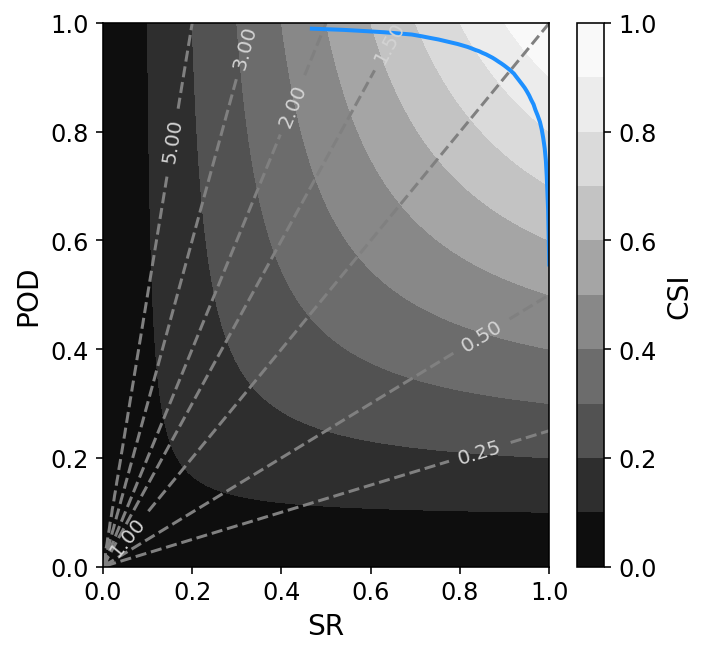

In [43]:
ax = make_performance_diagram_axis()
ax.plot(srs,pods,'-', color='dodgerblue', markerfacecolor='w', lw=2)

> We can now see where the line comes from. The main purpose of the line is for some instances our trained model might be biased. Thus, this could be a way to achieve better performance without having to adjust the training of the model, all we would have to do is change is the threshold probability to something other than 0.5 to get better results.

> **Additional Metric: AUC of the ROC Curve**

  *   In the following few cells, an another metric and a diagram that is often used in Machine Learning for the classification task has been introduced. `The Area Under the Curve (AUC)` of the Reciever Operating Characterstic (ROC) curve.

  *  The ROC curve is similar to the performance diagram and is plotted with same axes as the performance diagram - `POD` and `POFD`
  
   



>>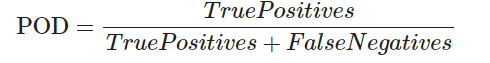

>>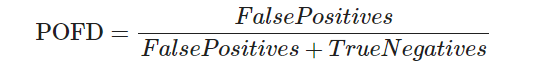

> Now, equipped with parameters we need to plot the ROC curve, we need to get the area under the ROC curve, to do that we use two helper functions from `gewitter_functions` - `get_points_in_roc_curve` and `get_area_under_roc_curve`

In [44]:
from gewitter_functions import get_points_in_roc_curve, get_area_under_roc_curve

# As we have done above, focussing on the output from class 1
y_preds = y_pred_proba[:,1]

pofds, pods = get_points_in_roc_curve(forecast_probabilities= y_preds, 
                                      observed_labels= y_validate, threshold_arg= np.linspace(0,1,100) )

AUC : 0.97


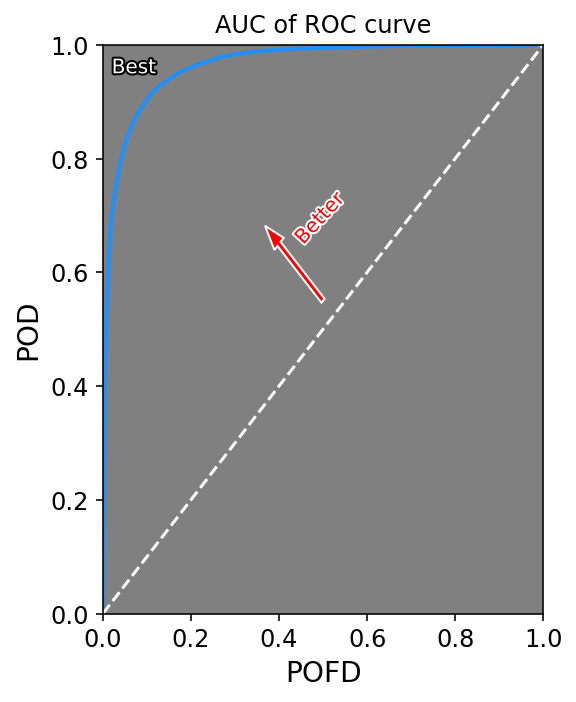

In [45]:
# Let's plot the ROC curve 

import matplotlib.patheffects as path_effects

pe = [path_effects.withStroke (linewidth=2, foreground='k')]
pe2 = [path_effects.withStroke(linewidth=2, foreground='w')]

# make the figure
fig = plt.figure(figsize=(4.1,5))
# Set the facecolor to white
fig.set_facecolor('w')

# plot the ROC curve
plt.plot(pofds, pods, color='dodgerblue', markerfacecolor='w', lw=2)

#Annotate the curve
plt.arrow(0.5,0.55, -0.1, 0.1, facecolor='r', zorder=5, width=0.01, edgecolor='w')
plt.text(0.43,0.65,'Better',rotation=47.5,color='r',path_effects=pe2)
plt.text(0.02,0.95,'Best',color='w',path_effects=pe,zorder=5)

# set limits
plt.xlim([0,1])
plt.ylim([0,1])

#set the no-skill line
plt.plot([0,1],[0,1],'--', color='white')
plt.title("AUC of ROC curve")
plt.xlabel('POFD')
plt.ylabel('POD')

plt.tight_layout()

# print out the AUC value
print(f"AUC : {np.round(get_area_under_roc_curve(pofds,pods),2)}")

> To conclude, A perfect performing model will have an AUC of 1, we have obtained an AUC of approximately 0.97 with our model which is great. To elucidate visually, the closer our blue line is to the top left corner, the better the model is performing, but in contrast of if the line is near the diagonal, then the model has little to no skill or in simple terms it is just guesssing.

# Examples in the community

> Currently, there are numerous use cases of these Machine Learning methods in the real world. Taking the meteorology community into consideration, we observed a familiar example `Prediction of Thunderstorms` was used to contextualize the Machine Learning methods. The document `A Machine Learning Tutorial for Operational Meteorology. Part I: Conventional Machine Learning` discusses general machine learning methods as well as best practices to help meteorologists and readers use Machine learning to their own datasets.

# Data statement

> The dataset/data used in this notebook is obtained from the paper `A Machine Learning Tutorial for Operational Meteorology. Part I: Conventional Machine Learning` (`https://github.com/ai2es/WAF_ML_Tutorial_Part1/tree/main/datasets`)

# References

> This notebook refers to the following publication:

> Randy J. Chase et al: A Machine Learning Tutorial for Operational Meteorology. Part I: Conventional Machine Learning, https://journals.ametsoc.org/view/journals/wefo/37/8/WAF-D-22-0070.1.xml







